In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor

In [2]:
diet_df = pd.read_csv('diet_history.csv', quoting=1)

In [3]:
diet_df

,weight,loss,diet_active,m_st_jeor_formular,harris_benedict_formular,avg_formular,deficit,energy_consumption,bmi
0,"129,60","-0,90","1,00","2274,00","2526,32","2400,16","-359,16","2041,00","39,13"
1,"129,30","-0,30","1,00","2265,00","2513,99","2389,50","-389,50","2000,00","39,04"
2,"128,00","-1,30","1,00","2262,01","2509,88","2385,94","-485,94","1900,00","38,64"
3,"127,90","-0,10","1,00","2249,02","2492,07","2370,55","-270,55","2100,00","38,61"
4,"127,20","-0,70","1,00","2248,02","2490,70","2369,36","-231,36","2138,00","38,40"
5,"126,20","-1,00","1,00","2241,03","2481,11","2361,07","-453,07","1908,00","38,10"
6,"125,30","-0,90","1,00","2231,04","2467,41","2349,22","-349,22","2000,00","37,83"
7,"124,30","-1,00","1,00","2222,05","2455,08","2338,56","-169,56","2169,00","37,53"
8,"124,10","-0,20","0,00","2212,06","2441,38","2326,72","-4,72","2322,00","37,47"
9,"123,80","-0,30","0,00","2210,06","2438,64","2324,35","-55,35","2269,00","37,37"


# Data preparation

In [4]:
diet_df.dtypes

weight                      object
loss                        object
diet_active                 object
m_st_jeor_formular          object
harris_benedict_formular    object
avg_formular                object
deficit                     object
energy_consumption          object
bmi                         object
dtype: object

In [5]:
# clean and convert columns to proper data type
for col, series in diet_df.items():
    print(col+"-")
    diet_df[col] = diet_df[col].apply(lambda o: str(o).replace(",",".")).astype(float)

print(diet_df)

weight-
loss-
diet_active-
m_st_jeor_formular-
harris_benedict_formular-
avg_formular-
deficit-
energy_consumption-
bmi-
    weight  loss  diet_active  m_st_jeor_formular  harris_benedict_formular  \
0    129.6  -0.9          1.0             2274.00                   2526.32   
1    129.3  -0.3          1.0             2265.00                   2513.99   
2    128.0  -1.3          1.0             2262.01                   2509.88   
3    127.9  -0.1          1.0             2249.02                   2492.07   
4    127.2  -0.7          1.0             2248.02                   2490.70   
5    126.2  -1.0          1.0             2241.03                   2481.11   
6    125.3  -0.9          1.0             2231.04                   2467.41   
7    124.3  -1.0          1.0             2222.05                   2455.08   
8    124.1  -0.2          0.0             2212.06                   2441.38   
9    123.8  -0.3          0.0             2210.06                   2438.64   
10   122.7

In [6]:
diet_df.dtypes

weight                      float64
loss                        float64
diet_active                 float64
m_st_jeor_formular          float64
harris_benedict_formular    float64
avg_formular                float64
deficit                     float64
energy_consumption          float64
bmi                         float64
dtype: object

In [7]:
print(diet_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   weight                    16 non-null     float64
 1   loss                      16 non-null     float64
 2   diet_active               16 non-null     float64
 3   m_st_jeor_formular        16 non-null     float64
 4   harris_benedict_formular  16 non-null     float64
 5   avg_formular              16 non-null     float64
 6   deficit                   16 non-null     float64
 7   energy_consumption        16 non-null     float64
 8   bmi                       16 non-null     float64
dtypes: float64(9)
memory usage: 1.3 KB
None


## Select matrices

In [8]:
y = diet_df.iloc[:,1].values
x = diet_df.drop(columns=["loss", "m_st_jeor_formular", "harris_benedict_formular", "avg_formular", "energy_consumption"])
x

,weight,diet_active,deficit,bmi
0,129.6,1.0,-359.16,39.13
1,129.3,1.0,-389.50,39.04
2,128.0,1.0,-485.94,38.64
3,127.9,1.0,-270.55,38.61
4,127.2,1.0,-231.36,38.40
5,126.2,1.0,-453.07,38.10
6,125.3,1.0,-349.22,37.83
7,124.3,1.0,-169.56,37.53
8,124.1,0.0,-4.72,37.47
9,123.8,0.0,-55.35,37.37


In [9]:
print(y)

[-0.9 -0.3 -1.3 -0.1 -0.7 -1.  -0.9 -1.  -0.2 -0.3 -1.1  2.1  0.5 -0.1
 -2.7 -0.6]


In [10]:
# fill missing data
imputer = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value=5000)
imputer.fit(x)
x = imputer.transform(x)

print(x)

[[ 129.6     1.   -359.16   39.13]
 [ 129.3     1.   -389.5    39.04]
 [ 128.      1.   -485.94   38.64]
 [ 127.9     1.   -270.55   38.61]
 [ 127.2     1.   -231.36   38.4 ]
 [ 126.2     1.   -453.07   38.1 ]
 [ 125.3     1.   -349.22   37.83]
 [ 124.3     1.   -169.56   37.53]
 [ 124.1     0.     -4.72   37.47]
 [ 123.8     0.    -55.35   37.37]
 [ 122.7     1.   -160.8    37.04]
 [ 124.8     0.    328.23   37.68]
 [ 125.3     0.    390.36   37.83]
 [ 125.2     0.    488.44   37.8 ]
 [ 122.5     1.   -518.38   36.98]
 [ 121.9     1.   -133.4    36.8 ]]


# 1.2 Check if it is a linear problem

### 1.2.1 weight relation to loss

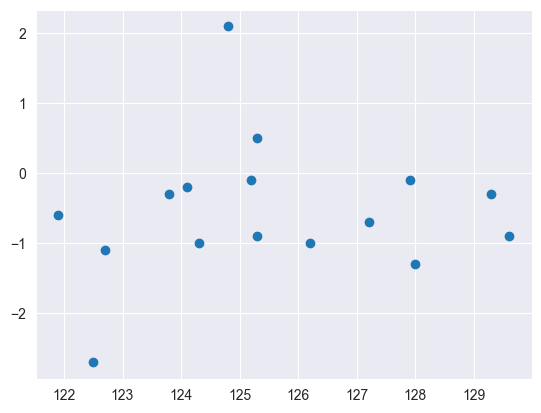

In [11]:
plt.scatter(x[:,0],y)
plt.show()

### 1.2.1 kcal relation to loss

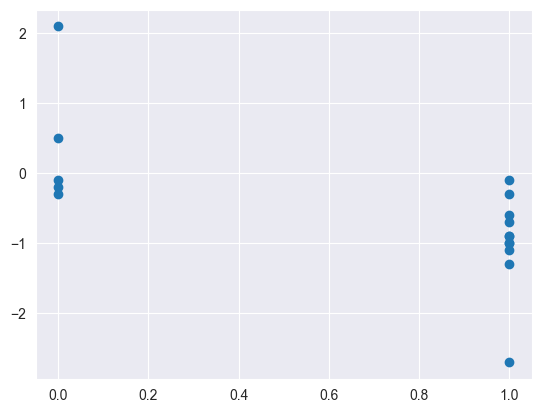

In [12]:
plt.scatter(x[:,1],y)
plt.show()

### 1.2.1 steps relation to loss

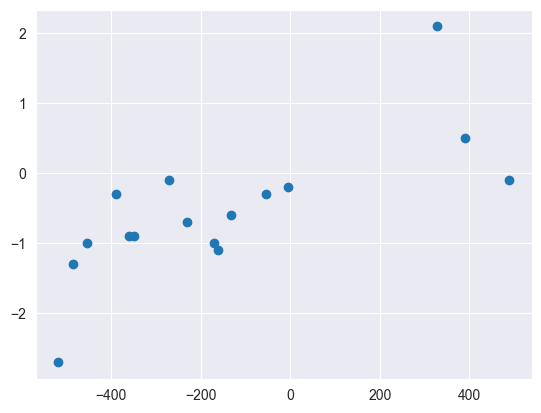

In [13]:
plt.scatter(x[:,2],y)
plt.show()

In [14]:
correlation = pd.DataFrame(x)

correlation['loss'] = y
correlation['weight'] = correlation[0]
correlation['diet_active'] = correlation[1]
correlation['deficit'] = correlation[2]
correlation['bmi'] = correlation[3]

correlation.drop(columns=[0,1,2,3], inplace=True)

correlation = correlation.corr()
print(correlation)

                 loss    weight  diet_active   deficit       bmi
loss         1.000000  0.108058    -0.654155  0.734423  0.109515
weight       0.108058  1.000000     0.255821 -0.281461  0.999991
diet_active -0.654155  0.255821     1.000000 -0.842711  0.254622
deficit      0.734423 -0.281461    -0.842711  1.000000 -0.279867
bmi          0.109515  0.999991     0.254622 -0.279867  1.000000


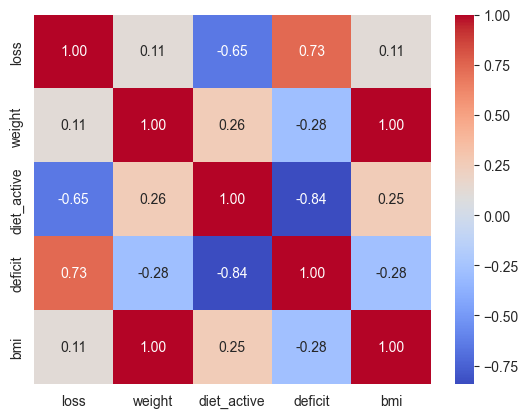

In [15]:
sns.heatmap(correlation,cmap="coolwarm", annot=True, fmt=".2f")
plt.show()

## Split dataset in training and test set


In [16]:
x

array([[ 129.6 ,    1.  , -359.16,   39.13],
       [ 129.3 ,    1.  , -389.5 ,   39.04],
       [ 128.  ,    1.  , -485.94,   38.64],
       [ 127.9 ,    1.  , -270.55,   38.61],
       [ 127.2 ,    1.  , -231.36,   38.4 ],
       [ 126.2 ,    1.  , -453.07,   38.1 ],
       [ 125.3 ,    1.  , -349.22,   37.83],
       [ 124.3 ,    1.  , -169.56,   37.53],
       [ 124.1 ,    0.  ,   -4.72,   37.47],
       [ 123.8 ,    0.  ,  -55.35,   37.37],
       [ 122.7 ,    1.  , -160.8 ,   37.04],
       [ 124.8 ,    0.  ,  328.23,   37.68],
       [ 125.3 ,    0.  ,  390.36,   37.83],
       [ 125.2 ,    0.  ,  488.44,   37.8 ],
       [ 122.5 ,    1.  , -518.38,   36.98],
       [ 121.9 ,    1.  , -133.4 ,   36.8 ]])

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

## Feature scaling

In [18]:
feature_scaling = False
if feature_scaling:
    sc = StandardScaler()
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)

In [19]:
if feature_scaling:
    print(x_train)

In [20]:
if feature_scaling:
    print(x_test)

## Training

In [21]:
regressor = RandomForestRegressor(random_state=42,n_estimators=1000)
regressor.fit(x_train, y_train)

,n_estimators,1000
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Prediction

In [22]:
x_test

array([[ 129.3 ,    1.  , -389.5 ,   39.04],
       [ 125.3 ,    1.  , -349.22,   37.83],
       [ 124.1 ,    0.  ,   -4.72,   37.47],
       [ 123.8 ,    0.  ,  -55.35,   37.37]])

In [23]:
y_predicted = regressor.predict(x_test)

comparison = y_predicted.reshape(len(y_predicted),1)
comparison = np.concatenate((comparison,y_test.reshape(len(y_test),1)), axis=1)

print(y_predicted)
print(y_test)
print(comparison)

[-0.8888 -0.8474  0.5534  0.5427]
[-0.3 -0.9 -0.2 -0.3]
[[-0.8888 -0.3   ]
 [-0.8474 -0.9   ]
 [ 0.5534 -0.2   ]
 [ 0.5427 -0.3   ]]


In [24]:
r2_score(y_test,y_predicted)

-4.291730243902413

In [25]:
for v in x_test[0]:
    print(f"{v:.2f}")

129.30
1.00
-389.50
39.04


In [26]:
x_test

array([[ 129.3 ,    1.  , -389.5 ,   39.04],
       [ 125.3 ,    1.  , -349.22,   37.83],
       [ 124.1 ,    0.  ,   -4.72,   37.47],
       [ 123.8 ,    0.  ,  -55.35,   37.37]])

In [ ]:
x_example = [
    [121.9,1.0, 0.0,36.0]
]
if feature_scaling:
    x_example = sc.transform(x_example)
y_predicted = regressor.predict(x_example)

print(y_predicted)